The performance of a machine learning model can be characterized in terms of the bias and the variance of the model.

A model with high bias makes strong assumptions about the form of the unknown underlying function that maps inputs to outputs in the dataset, such as linear regression. A model with high variance is highly dependent upon the specifics of the training dataset, such as unpruned decision trees. We desire models with low bias and low variance, although there is often a trade-off between these two concerns.

The bias-variance trade-off is a useful conceptualization for selecting and configuring models, although generally cannot be computed directly as it requires full knowledge of the problem domain, which we do not have. Nevertheless, in some cases, we can estimate the error of a model and divide the error down into bias and variance components, which may provide insight into a given model’s behavior.


Model error consists of model variance, model bias, and irreducible error.
We seek models with low bias and variance, although typically reducing one results in a rise in the other.
We want to learn how to decompose mean squared error into model bias and variance terms.

Error(Model) = Variance(Model) + Bias(Model) + Variance(Irreducible Error)

Model Bias
The bias is a measure of how close the model can capture the mapping function between inputs and outputs.

It captures the rigidity of the model: the strength of the assumption the model has about the functional form of the mapping between inputs and outputs.

A model with high bias is helpful when the bias matches the true but unknown underlying mapping function for the predictive modeling problem. Yet, a model with a large bias will be completely useless when the functional form for the problem is mismatched with the assumptions of the model, e.g. assuming a linear relationship for data with a high non-linear relationship.

Low Bias: Weak assumptions regarding the functional form of the mapping of inputs to outputs.
High Bias: Strong assumptions regarding the functional form of the mapping of inputs to outputs.
The bias is always positive.

Model Variance
The variance of the model is the amount the performance of the model changes when it is fit on different training data.

It captures the impact of the specifics the data has on the model.

A model with high variance will change a lot with small changes to the training dataset. Conversely, a model with low variance will change little with small or even large changes to the training dataset.

Low Variance: Small changes to the model with changes to the training dataset.
High Variance: Large changes to the model with changes to the training dataset.
The variance is always positive.


Irreducible Error
On the whole, the error of a model consists of reducible error and irreducible error.

Model Error = Reducible Error + Irreducible Error
The reducible error is the element that we can improve. It is the quantity that we reduce when the model is learning on a training dataset and we try to get this number as close to zero as possible.

The irreducible error is the error that we can not remove with our model, or with any model.

The error is caused by elements outside our control, such as statistical noise in the observations.

As such, although we may be able to squash the reducible error to a very small value close to zero, or even zero in some cases, we will also have some irreducible error. It defines a lower bound in performance on a problem

It is a reminder that no model is perfect.


Bias-Variance Trade-off
The bias and the variance of a model’s performance are connected.

Ideally, we would prefer a model with low bias and low variance, although in practice, this is very challenging. In fact, this could be described as the goal of applied machine learning for a given predictive modeling problem,

Reducing the bias can easily be achieved by increasing the variance. Conversely, reducing the variance can easily be achieved by increasing the bias.

This relationship is generally referred to as the bias-variance trade-off. It is a conceptual framework for thinking about how to choose models and model configuration.

We can choose a model based on its bias or variance. Simple models, such as linear regression and logistic regression, generally have a high bias and a low variance. Complex models, such as random forest, generally have a low bias but a high variance.

We may also choose model configurations based on their effect on the bias and variance of the model. The k hyperparameter in k-nearest neighbors controls the bias-variance trade-off. Small values, such as k=1, result in a low bias and a high variance, whereas large k values, such as k=21, result in a high bias and a low variance.

High bias is not always bad, nor is high variance, but they can lead to poor results.

We often must test a suite of different models and model configurations in order to discover what works best for a given dataset. A model with a large bias may be too rigid and underfit the problem. Conversely, a large variance may overfit the problem.

We may decide to increase the bias or the variance as long as it decreases the overall estimate of model error.


How can I calculate the bias-variance trade-off for my algorithm on my dataset?

Technically, we cannot perform this calculation.

We cannot calculate the actual bias and variance for a predictive modeling problem.

This is because we do not know the true mapping function for a predictive modeling problem.

Instead, we use the bias, variance, irreducible error, and the bias-variance trade-off as tools to help select models, configure models, and interpret results.

Even though the bias-variance trade-off is a conceptual tool, we can estimate it in some cases.

The mlxtend library by Sebastian Raschka provides the bias_variance_decomp() function that can estimate the bias and variance for a model over multiple bootstrap samples.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from tqdm import tqdm

In [ ]:
!pip install mlxtend==0.19.0

In [ ]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 22.418
Bias: 20.744
Variance: 1.674


Results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that the model has a high bias and a low variance. This is to be expected given that we are using a linear regression model. We can also see that the sum of the estimated mean and variance equals the estimated error of the model, e.g. 20.726 + 1.761 = 22.487.


Linear machine learning algorithms often have a high bias but a low variance.
Nonlinear machine learning algorithms often have a low bias but a high variance.

The parameterization of machine learning algorithms is often a battle to balance out bias and variance.

Below are two examples of configuring the bias-variance trade-off for specific algorithms:

The k-nearest neighbors algorithm has low bias and high variance, but the trade-off can be changed by increasing the value of k which increases the number of neighbors that contribute t the prediction and in turn increases the bias of the model.
The support vector machine algorithm has low bias and high variance, but the trade-off can be changed by increasing the C parameter that influences the number of violations of the margin allowed in the training data which increases the bias but decreases the variance.
There is no escaping the relationship between bias and variance in machine learning.

Increasing the bias will decrease the variance.
Increasing the variance will decrease the bias.
There is a trade-off at play between these two concerns and the algorithms you choose and the way you choose to configure them are finding different balances in this trade-off for your problem

In reality, we cannot calculate the real bias and variance error terms because we do not know the actual underlying target function. Nevertheless, as a framework, bias and variance provide the tools to understand the behavior of machine learning algorithms in the pursuit of predictive performance.

In [ ]:
'''
https://towardsdatascience.com/bias-variance-trade-off-with-python-example-6519d2084be4
https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
https://towardsdatascience.com/bias-and-variance-in-linear-models-e772546e0c30
https://github.com/DarkestFloyd/blog_files/blob/master/bias_variance/bias_variance.ipynb
https://towardsdatascience.com/the-bias-variance-trade-off-explained-practically-in-python-48cf29d9e900
'''

In [ ]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 24.893
Bias: 23.252
Variance: 1.640


In [ ]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 24.431
Bias: 23.134
Variance: 1.297


In [ ]:
# generate dataset from y = 2 + 3x
def sim_data(N = 500, b0 = 2, b1 = 3, runs = 1000):
    data = np.zeros(shape=(runs, N, 2))
    for i in range(runs):
        x = np.random.uniform(-2, 2, size=(N, 1))
        e = np.random.normal(0, 8, size=(N, 1))
        y = b0 + b1 * x + e  # y = 2x + 3 + E
        data[i] = np.column_stack((x, y))
    return data

In [ ]:
# helper to create array of models
def make_models(alpha):
    return [LinearRegression(fit_intercept=True, normalize=True), 
            Ridge(fit_intercept=True, alpha=alpha, normalize=True, solver="saga"),
            Lasso(fit_intercept=True, alpha=alpha, normalize=True)]

In [ ]:
# helper to generate data, fit models, cache results and return 
def do_pred(data, X_test, n=1000, alpha=0.5):
    models = make_models(alpha=alpha)
    coefs = np.zeros(shape=(n, len(models)))
    intercepts = np.zeros(shape=(n, len(models)))
    preds = np.zeros(shape=(n, len(models)))
    # for n iters, simulate data, fit model, get coeffs
    for i in range(len(data)):
        X = data[i, :, 0].reshape(-1 ,1)
        y = data[i, :, 1].reshape(-1, 1)
        for idx, model in enumerate(models):
            model.fit(X, y)
            preds[i, idx] = model.predict(X_test)
            coefs[i, idx] = float(model.coef_)
            intercepts[i, idx] = float(model.intercept_)
    return coefs, intercepts, preds

In [ ]:
def compute_bv(preds, true):
    means = np.mean(preds, 0)
    bias = true - means
    variance = np.mean(np.abs(preds - means), 0)
    return bias, variance

In [ ]:
# helper to plot, c is the coefficient array of size (N x 3)
def show_plot(p, alpha, filename=None):
    plt.figure(figsize=(10, 5))
    
    # plot distribution, colors from color brewer
    plt.hist(p[:, 0], label="OLS", alpha=0.5, bins=50, color="#2ca25f")
    plt.hist(p[:, 1], label="Ridge", alpha=0.5, bins=50, color="#e6550d")
    plt.hist(p[:, 2], label="Lasso", alpha=0.5, bins=50, color="#3182bd")
    
    # plot means of predictions 
    _means = np.mean(p, axis=0)
    plt.vlines(x=_means, ymin=0, ymax=80, linestyles="dashed", linewidth=2,
               colors=["#006d2c", "#a63603", "#08519c"])
    plt.vlines(x=11, ymin=0, ymax=80, linestyles="dashed", linewidth=2,
               colors="#737373", label="True")

    # final touches
    plt.ylim(0, 70)
    plt.legend(bbox_to_anchor=(1, 1))
    if alpha == "FAKE":
        ttl = "Fabricated distribution of predictions"
    else:
        ttl = "Distribution of prediction for lambda = {0}".format(alpha)
    plt.title(ttl)
    
    if filename:
        plt.savefig('./figures/{0}'.format(filename))
    plt.show()

In [ ]:
data = sim_data()
X_test = np.array([[3]])

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standar

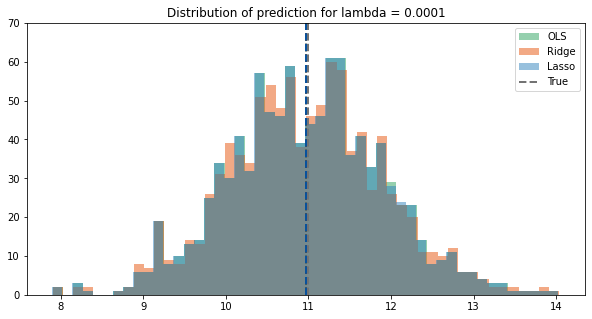

In [ ]:
c, i, p = do_pred(data, X_test, alpha=0.0001)
show_plot(p, 0.0001, None)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standar

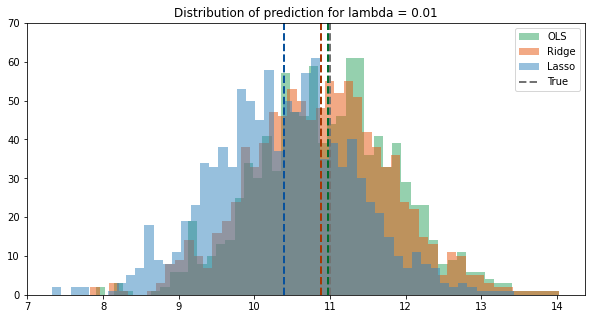

In [ ]:
c, i, p = do_pred(data, X_test, alpha=0.01)
show_plot(p, 0.01, None)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standar

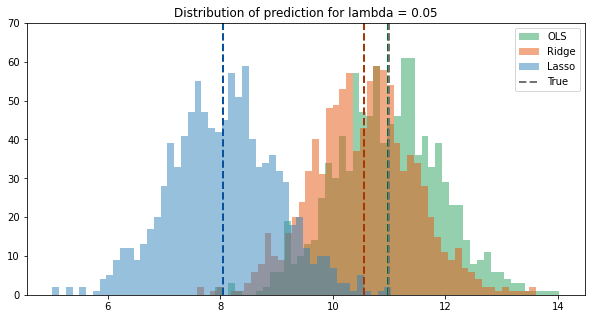

In [ ]:
c, i, p = do_pred(data, X_test, alpha=0.05)
show_plot(p, 0.05, None)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standar

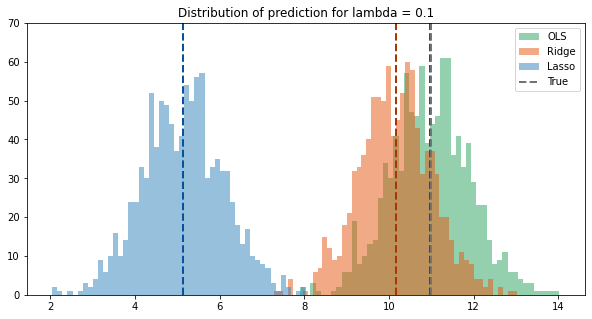

In [ ]:
c, i, p = do_pred(data, X_test, alpha=0.1)
show_plot(p, 0.1, None)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standar

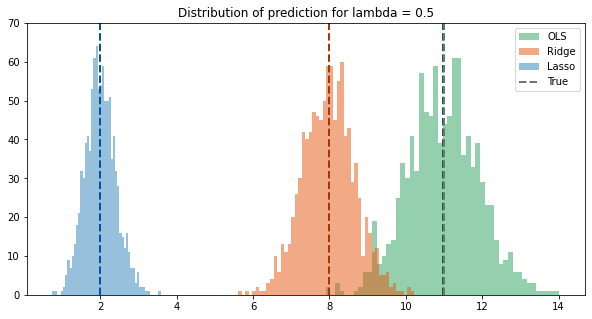

In [ ]:
c, i, p = do_pred(data, X_test, alpha=0.5)
show_plot(p, 0.5, None)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standar

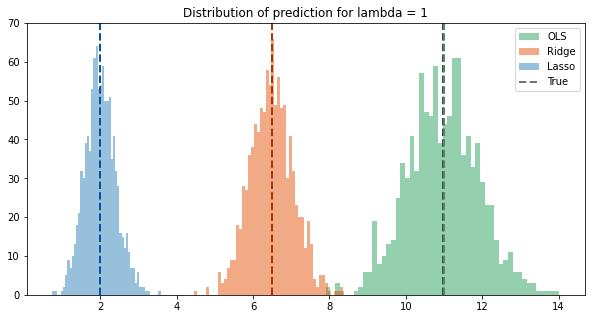

In [ ]:
c, i, p = do_pred(data, X_test, alpha=1)
show_plot(p, 1, None)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standar

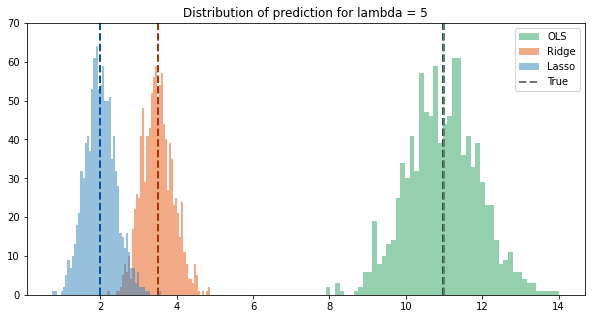

In [ ]:
c, i, p = do_pred(data, X_test, alpha=5)
show_plot(p, 5, None)

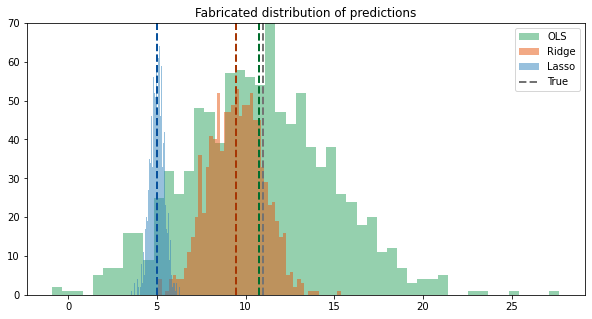

In [ ]:
ols_fake = np.random.normal(11, 4, size=1000)
ridge_fake = np.random.normal(9.5, 1.5, size=1000)
lasso_fake = np.random.normal(5, 0.4, size=1000)
fake_data = np.column_stack((ols_fake, ridge_fake, lasso_fake))
show_plot(fake_data, "FAKE", None)

In [ ]:
lambdas = np.linspace(0.0001, 1, 100)

In [ ]:
bias = np.zeros(shape=(len(lambdas), 3))
variance = np.zeros(shape=(len(lambdas), 3))

In [ ]:
for idx, _lambda in tqdm(enumerate(lambdas)):
    c, i, p = do_pred(data, X_test, alpha=_lambda)
    b, v = compute_bv(p, true=11)
    bias[idx, :] = b
    variance[idx, :] = v

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(lambdas, bias[:, 0], label="OLS", color="#2ca25f")
plt.plot(lambdas, bias[:, 1], label="Ridge", color="#d95f0e")
plt.plot(lambdas, bias[:, 2], label="Lasso", color="#2b8cbe")
plt.xlabel("Regularization coefficient")
plt.ylabel("Bias")
plt.title("Bias vs Lambda")
plt.legend(loc="upper right")
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(lambdas, variance[:, 0], label="OLS", color="#2ca25f")
plt.plot(lambdas, variance[:, 1], label="Ridge", color="#d95f0e")
plt.plot(lambdas, variance[:, 2], label="Lasso", color="#2b8cbe")
plt.xlabel("Regularization coefficient")
plt.ylabel("Variance")
plt.title("Variance vs Lambda")
plt.legend(loc="upper right")
plt.grid()
plt.savefig("figures/bvplot.png")
plt.show()